In [113]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
% matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

from sklearn import metrics

In [80]:
#Data Description
data=pd.read_csv(r'C:\Users\THABONTSIKI\Documents\school\documents from PC\Y4S2\AI\901010064\ai ass\diabetes.csv')

In [81]:

print(data.head().transpose())

                                0       1        2       3        4
Pregnancies                 6.000   1.000    8.000   1.000    0.000
Glucose                   148.000  85.000  183.000  89.000  137.000
BloodPressure              72.000  66.000   64.000  66.000   40.000
SkinThickness              35.000  29.000    0.000  23.000   35.000
Insulin                     0.000   0.000    0.000  94.000  168.000
BMI                        33.600  26.600   23.300  28.100   43.100
DiabetesPedigreeFunction    0.627   0.351    0.672   0.167    2.288
Age                        50.000  31.000   32.000  21.000   33.000
Outcome                     1.000   0.000    1.000   0.000    1.000


In [116]:
#inserting number of n records 
textView = widgets.Label("Enter n number of records:")
display(textView)

input = widgets.Text(placeholder="Type here")
display(input)

button = widgets.Button(description="Click")
button.style.button_color = 'blue'
button.style.button_width='50cm'
output = widgets.Output()
display(button,output)

def on_button_clicked(b):
    with output:
        print(data.head())

button.on_click(on_button_clicked)

Label(value=u'Enter n number of records:')

Text(value=u'', placeholder=u'Type here')

Button(description=u'Click', style=ButtonStyle(button_color='blue'))

Output()

In [82]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


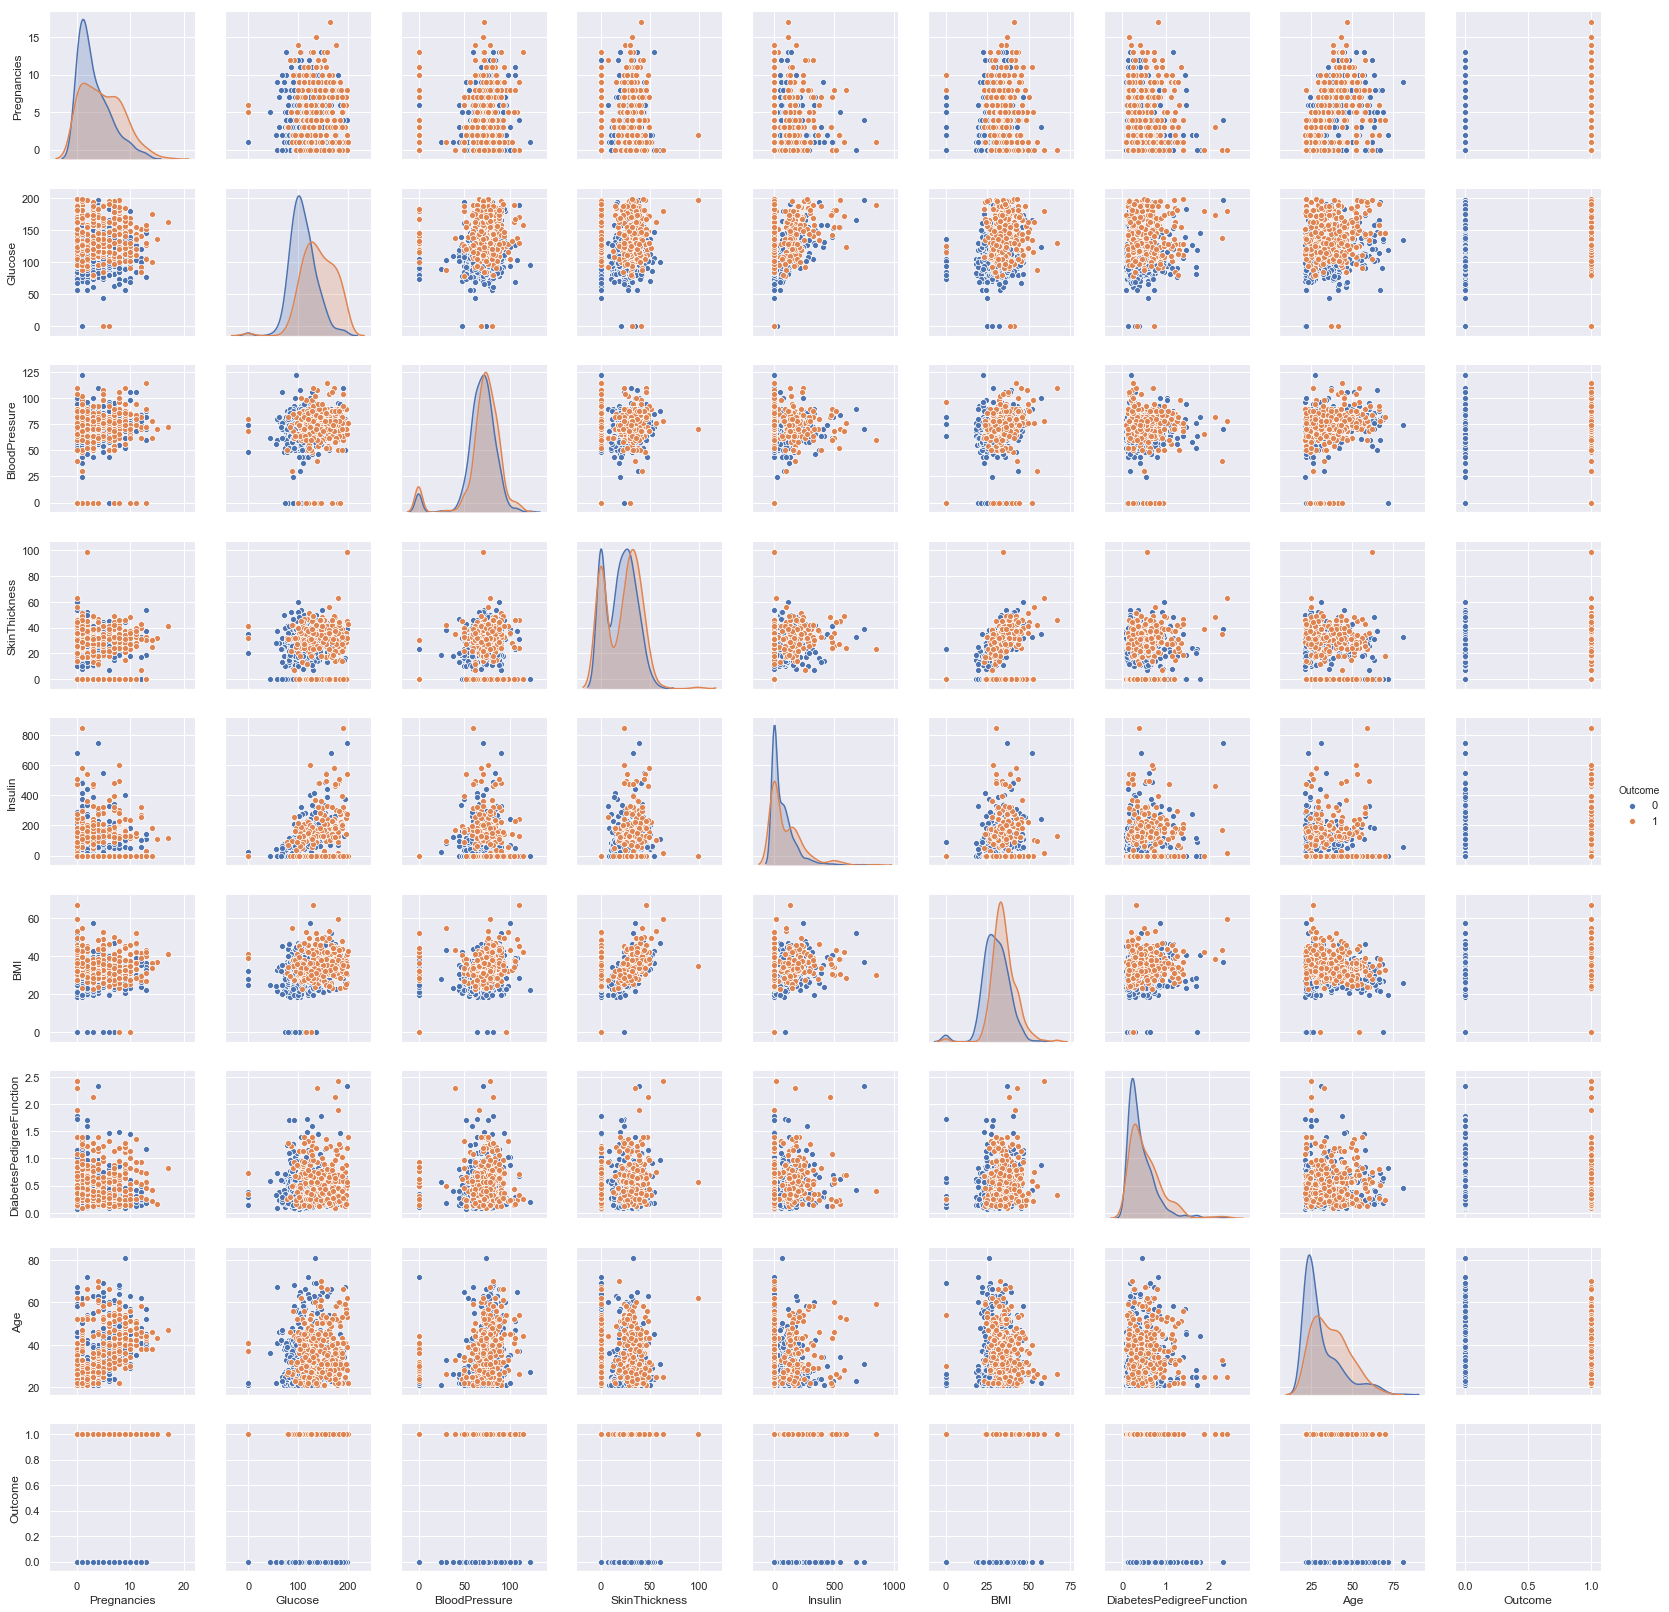

In [84]:
sns.pairplot(data, diag_kind= 'kde', hue= 'Outcome')

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

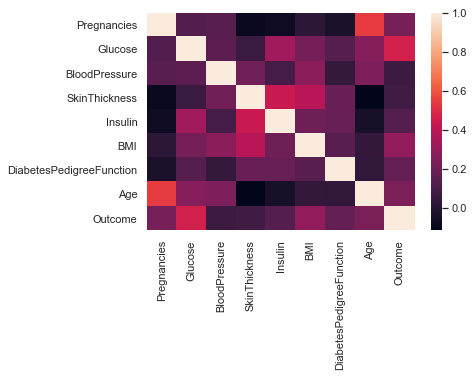

In [89]:
#Data Exploration


# Correlation Matrix Heatmap Visualization
corr = data.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

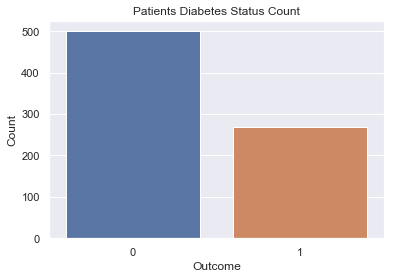

In [90]:
_ = sns.countplot(x='Outcome', data=data).set(title='Patients Diabetes Status Count', xlabel='Outcome', ylabel='Count')

In [91]:
#outlier remove
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1 
print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR) 
#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

('---Q1--- \n', Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64)
('\n---Q3--- \n', Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64)
('\n---IQR---\n', Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.

In [92]:
#outlier remove 
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,data_out.shape

((768, 9), (639, 9))

In [93]:
#lets extract features and targets
X=data_out.drop(columns=['Outcome'])
y=data_out['Outcome']

In [94]:

#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [95]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((511, 8), (128, 8), (511L,), (128L,))

In [96]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [111]:
# building the model

#Logistic Regression
acc=[]
roc=[] 
clf=LogisticRegression() 
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X) 

#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac) 


#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10) 
display_result(result)
#display predicted values uncomment below line
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.78125 ROC 0.653456221198
('TP: ', array([ 8,  7, 11,  6, 10,  9,  7,  6,  9,  8], dtype=int64))
('TN: ', array([31, 35, 30, 35, 32, 31, 30, 31, 31, 30], dtype=int64))
('FN: ', array([ 9, 10,  6, 11,  7,  7,  9, 10,  7,  8], dtype=int64))
('FP: ', array([4, 0, 5, 0, 3, 4, 4, 3, 3, 4], dtype=int64))


Actual  Predicted
229       0          0
671       0          0
51        0          0
536       0          0
500       0          0

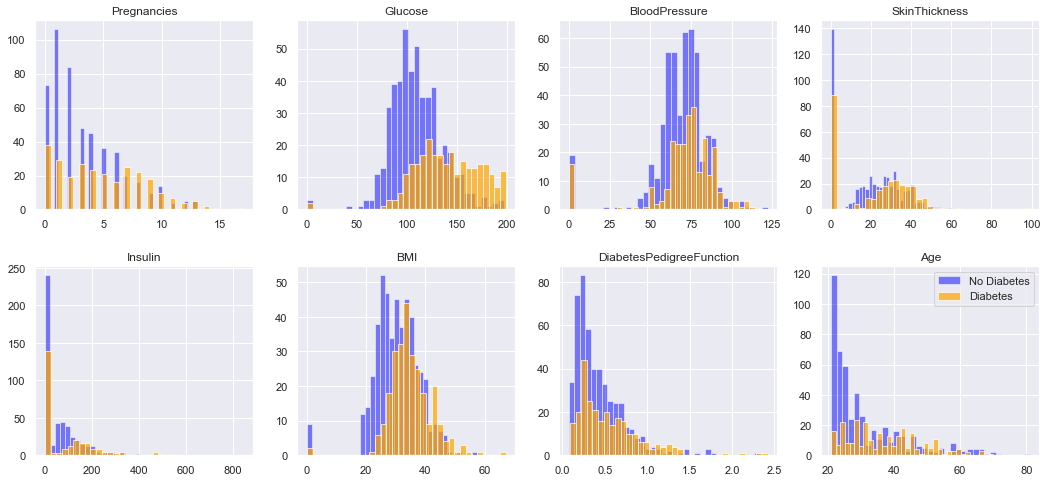

In [98]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#    data[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    data[data.Outcome==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    data[data.Outcome==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

In [99]:
#Dataset Preparation (splitting and normalization)
dataTrain = data[:650]
dataTest = data[650:750]
dataCheck = data[750:]

In [100]:
trainLabel = np.asarray(dataTrain['Outcome'])
trainData = np.asarray(dataTrain.drop('Outcome',1))
testLabel = np.asarray(dataTest['Outcome'])
testData = np.asarray(dataTest.drop('Outcome',1))

In [101]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds
# np.mean(trainData, axis=0) => check that new means equal 0
# np.std(trainData, axis=0) => check that new stds equal 1

In [102]:
#Training and Evaluating Machine Learning Model
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

('accuracy = ', 78.0, '%')


In [104]:
#Saving the Model
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

In [105]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [110]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

('accuracy = ', 78.0, '%')


In [108]:
#Making Predictions with the model
print(dfCheck.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
750            4      136             70              0        0  31.2   
751            1      121             78             39       74  39.0   
752            3      108             62             24        0  26.0   
753            0      181             88             44      510  43.3   
754            8      154             78             32        0  32.4   

     DiabetesPedigreeFunction  Age  Outcome  
750                     1.182   22        1  
751                     0.261   28        0  
752                     0.223   25        0  
753                     0.222   26        1  
754                     0.443   45        1  


In [109]:
sampleData = dfCheck[:1]
# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
# predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

('Probability:', array([[0.4385153, 0.5614847]]))
('prediction:', array([1], dtype=int64))
